### Практическое задание 6


In [140]:
# !pip install openpyxl

import pandas as pd
from sklearn.metrics import classification_report, accuracy_score
import sklearn.tree as tree
from matplotlib import pyplot as plt

In [136]:
def label_to_int(df: pd.DataFrame):
    data = df.to_numpy()
    for x in range(data.shape[1]):
        cls = {}
        for idx, chunk in enumerate(data[:, x]):
            try:
                int_cls = cls[chunk]
            except KeyError:
                cls[chunk] = len(cls.values())
                int_cls = cls[chunk]
            data[idx, x] = int_cls
    new_df = pd.DataFrame.from_records(data)
    new_df.columns = df.columns
    return new_df

In [144]:
data = pd.read_excel('./train_set_2.xlsx')
data.index = data[data.columns[0]]
data = data.drop(columns=data.columns[0])
print(data)
data = label_to_int(data)

X_TO_CHECK = data.iloc[-1][data.columns[:-1]]
data = data.drop(len(data) - 1)

X, Y = data[data.columns[:-1]], data[data.columns[-1]]
y = Y
X, Y, X_TO_CHECK

       Соперник Где играем      Лидеры Дождь Победа
Номер                                              
G1         Выше       Дома    На месте    Да    Нет
G2         Выше       Дома    На месте   Нет     Да
G3         Выше       Дома  Пропускают   Нет     Да
G4         Ниже       Дома  Пропускают   Нет     Да
G5         Ниже   В гостях  Пропускают   Нет    Нет
G6         Ниже       Дома  Пропускают    Да     Да
G7         Выше   В гостях    На месте    Да    Нет
G8         Ниже   В гостях    На месте   Нет    ???


(   Соперник  Где играем  Лидеры  Дождь
 0         0           0       0      0
 1         0           0       0      1
 2         0           0       1      1
 3         1           0       1      1
 4         1           1       1      1
 5         1           0       1      0
 6         0           1       0      0,
 0    0
 1    1
 2    1
 3    1
 4    0
 5    1
 6    0
 Name: Победа, dtype: int64,
 Соперник      1
 Где играем    1
 Лидеры        0
 Дождь         1
 Name: 7, dtype: int64)

clf_acc=1.000


[Text(0.6666666666666666, 0.875, 'Где играем <= 0.5\ngini = 0.49\nsamples = 7\nvalue = [3, 4]\nclass = Нет'),
 Text(0.5, 0.625, 'Дождь <= 0.5\ngini = 0.32\nsamples = 5\nvalue = [1, 4]\nclass = Нет'),
 Text(0.5833333333333333, 0.75, 'True  '),
 Text(0.3333333333333333, 0.375, 'Лидеры <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = Да'),
 Text(0.16666666666666666, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = Да'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Нет'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]\nclass = Нет'),
 Text(0.8333333333333334, 0.625, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = Да'),
 Text(0.75, 0.75, '  False')]

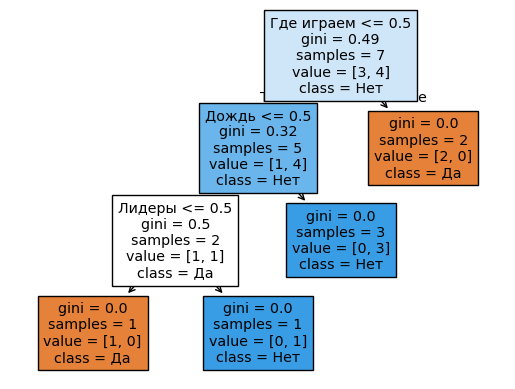

In [161]:
# 1. Постройте дерево решений минимальной высоты, которое дает точные предсказания исхода игры для различных условий.
clf = tree.DecisionTreeClassifier(
    max_depth=3,
    criterion='gini'
)
clf.fit(X, Y)
y_pred = clf.predict(X)
clf_acc = accuracy_score(Y, y_pred)
print(f'{clf_acc=:.3f}')
tree.plot_tree(
    clf,
    feature_names=X.columns,
    class_names=['Да', 'Нет'],
    filled=True)

In [164]:
print(X_TO_CHECK)
clf.predict([X_TO_CHECK])

Соперник      1
Где играем    1
Лидеры        0
Дождь         1
Name: 7, dtype: int64


/home/nia/.pyenv/versions/3.10.14/envs/ssau3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])